In [3]:
# ПАРАМЕТРЫ (все настраиваемые значения здесь)
g = 9.81          # Ускорение свободного падения (м/с²)
c = 343           # Скорость звука (м/с)
times = [3.1, 3.2, 3.0]       # Времена падения (пример)

# ФУНКЦИЯ РАСЧЁТА (без учёта сопротивления воздуха)
def calc_depth():
    T_avg = sum(times)/len(times)
    a, b = 0, 1000
    for _ in range(100):
        mid = (a + b)/2
        eq = (2*mid/g)**0.5 + mid/c - T_avg
        if eq < 0: a = mid
        else: b = mid
    return round((a + b)/2, 1)

# ЗАПУСК И ВЫВОД
depth = calc_depth()
print(f"Глубина шахты: {depth} м")

Глубина шахты: 244.2 м


In [11]:
# ПАРАМЕТРЫ (все настраиваемые значения здесь)
g = 9.81          # Ускорение свободного падения (м/с²)
c = 343           # Скорость звука (м/с)
times = [3.1, 3.2, 3.0]       # Времена падения (пример)

# ФУНКЦИЯ РАСЧЁТА (без учёта сопротивления воздуха)
def calc_depth():
    T_avg = sum(times)/len(times)
    a, b = 0, 1000
    for _ in range(100):
        mid = (a + b)/2
        eq = (2*mid/g)**0.5 + mid/c - T_avg
        if eq < 0: a = mid
        else: b = mid
    return round((a + b)/2, 1)

# ЗАПУСК И ВЫВОД
depth = calc_depth()
print(f"Глубина шахты: {depth} м")

Глубина шахты: 43.4 м


In [13]:
def calculate_fall_time_with_air_resistance(height, object_density, object_volume, temperature_c, g=9.8):
    """
    Вычисляет время падения объекта с учетом сопротивления воздуха.
    
    :param height: Высота падения (в метрах).
    :param object_density: Плотность объекта (в кг/м^3).
    :param object_volume: Объем объекта (в м^3).
    :param temperature_c: Температура воздуха (в градусах Цельсия).
    :param g: Ускорение свободного падения (м/с^2).
    :return: Время падения (в секундах).
    """
    # Константы
    gamma = 1.4  # Показатель адиабаты для воздуха
    R = 287      # Удельная газовая постоянная для воздуха (Дж/(кг·К))
    temperature_k = temperature_c + 273.15  # Перевод в Кельвины
    air_density = 101325 / (R * temperature_k)  # Плотность воздуха (кг/м^3)
    
    # Свойства объекта
    mass = object_density * object_volume  # Масса объекта (кг)
    cross_sectional_area = object_volume ** (2/3)  # Приближенная площадь поперечного сечения
    drag_coefficient = 0.47  # Коэффициент сопротивления для сферического объекта
    
    # Численное моделирование падения
    dt = 0.01  # Шаг по времени (секунды)
    velocity = 0  # Начальная скорость (м/с)
    position = height  # Начальная высота (м)
    time_elapsed = 0  # Прошедшее время (секунды)
    
    while position > 0:
        # Сила сопротивления воздуха
        drag_force = 0.5 * air_density * velocity**2 * drag_coefficient * cross_sectional_area
        
        # Ускорение с учетом сопротивления
        acceleration = g - drag_force / mass
        
        # Обновление скорости и положения
        velocity += acceleration * dt
        position -= velocity * dt
        time_elapsed += dt
    
    return time_elapsed

# Пример использования
try:
    height_measured = float(43.4)
    object_density = float(2000)
    object_volume = float(0.004)
    temperature = float(0)
    
    fall_time = calculate_fall_time_with_air_resistance(height_measured, object_density, object_volume, temperature)
    print(f"Время падения объекта: {fall_time:.2f} секунд")
except ValueError as e:
    print(f"Ошибка: {e}")

Время падения объекта: 3.00 секунд


In [16]:
import math

deph_t = 3.2 

# Настраиваемый блок параметров
h_altitude = 0  # Высота над уровнем моря (м)
temp_C = 0  # Температура воздуха (°C)
density_object = 2700  # Плотность объекта (кг/м³)
volume = 0.001  # Объем объекта (м³)
drag_coefficient = 0.47  # Коэффициент лобового сопротивления (сфера)
is_sphere = True  # Объект сферической формы

# Константы
g0 = 9.81  # Стандартное ускорение свободного падения (м/с²)
earth_radius = 6356000  # Радиус Земли (м)
pressure0 = 101325  # Давление на уровне моря (Па)
M_air = 0.029  # Молярная масса воздуха (кг/моль)
R_gas = 8.314  # Универсальная газовая постоянная (Дж/(моль·К))

# Рассчет параметров окружающей среды
temp_K = temp_C + 273.15  # Температура в Кельвинах
g = g0 * (earth_radius / (earth_radius + h_altitude)) ** 2  # Гравитация
pressure = pressure0 * math.exp(-M_air * g * h_altitude / (R_gas * temp_K))  # Давление
R_specific = R_gas / M_air  # Удельная газовая постоянная воздуха
rho_air = pressure / (R_specific * temp_K)  # Плотность воздуха

# Параметры объекта
mass = density_object * volume  # Масса объекта
if is_sphere:
    radius = (3 * volume / (4 * math.pi)) ** (1/3)
    area = math.pi * radius ** 2  # Площадь сечения для сферы
else:
    area = 0.01  # Пример для не сферического объекта

# Функция расчета глубины с учетом сопротивления воздуха
def calculate_depth(fall_time, dt=0.001):
    current_time = 0
    y, v = 0.0, 0.0
    while current_time < fall_time:
        if current_time + dt > fall_time:
            dt = fall_time - current_time  # Корректировка последнего шага
        force_drag = 0.5 * rho_air * abs(v) * v * drag_coefficient * area
        acceleration = g - force_drag / mass
        v += acceleration * dt
        y += v * dt
        current_time += dt
    return y

# Ввод времени падения и вывод результата
try:
    measured_time = float(deph_t)
    depth = calculate_depth(measured_time)
    print(f"Глубина: {depth:.2f} метров")
except ValueError:
    print("Ошибка: Введите числовое значение времени.")

Глубина: 49.14 метров


In [19]:
from matplotlib import pyplot as plt

In [24]:
arr = []
for i in range(12):
    arr.append(220*(2**(i/12)))

In [25]:
arr

[220.0,
 233.08188075904496,
 246.94165062806206,
 261.6255653005986,
 277.1826309768721,
 293.6647679174076,
 311.1269837220809,
 329.6275569128699,
 349.2282314330039,
 369.9944227116344,
 391.99543598174927,
 415.3046975799451]

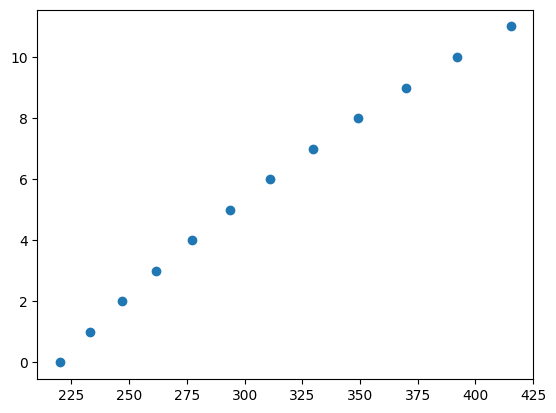

In [27]:
plt.scatter(arr, [i for i in range(len(arr))])

In [28]:
arr_sum = """Медиана охватов или просмотров	Стоимость рекламы
2 719	р.11 170
11 800	р.30 000
4 954	р.10 000
1 211	р.2 500
1 213	р.2 979
1 905	р.5 000
1 087	р.2 500
1 601	р.3 000
5 856	р.15 000
1 200	р.3 000
2 682	р.5 000
5 653	р.19 149
3 263	р.7 700
2 152	р.3 723
1 225	р.1 500
1 676	р.4 500
4 712	р.7 000
1 715	р.3 000
2 064	р.20 000
1 265	р.7 500
1 460	р.5 000
853	р.15 000
627	р.3 000
3 165	р.20 000
919	р.5 500
3 670	р.15 054
549	р.21 400
1 300	р.7 000
2 417	р.10 000
16 150	р.170 000
1 090	р.8 000
1 252	р.20 000
5 134	р.19 149
11 300	р.21 505
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.1 661
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
2 429	р.4 100
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
135 600	р.120 000
8 786	р.63 830
	р.15 957
	р.0
529	р.1 661
374	р.5 319
1 095	р.5 914
5 898	р.50 000
2 147	р.25 000
4 549	р.30 000
4 102	р.20 000
19 300	р.80 000
601	р.1 661
	р.25 000
940	р.30 000
	р.10 000
	р.150 000
969	р.6 000
1 765	р.12 000
1 147	р.7 900
1 207	р.8 000
1 472	р.16 000
8 859	р.35 000
3 955	р.15 000
2 398	р.15 000
26 400	р.77 000
2 109	р.18 800
19 350	р.62 000
	р.0
	р.0
	р.0
	р.0
	р.0
7 506	р.15 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
3 756	р.6 500
	р.1 661
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.500
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.100 000
	р.0
730	р.8 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.1 661
	р.0
	р.0
	р.0
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	-
7 064	р.12 500
2 984	р.1 400
1 309	р.1 000
3 156	р.2 550
5 469	р.5 300
6 677	р.9 000
27 050	р.27 000
12 250	р.9 000
1 851	р.2 000
3 726	р.3 400
857	р.1 000
9 797	р.8 000
1 399	р.2 150
2 658	р.4 000
18 950	р.10 588
5 425	р.5 000
13 400	р.12 971
671	р.700
1 919	р.2 800
22 100	р.29 787
4 919	р.6 000
	р.1 661
	р.1 661
647	р.7 000
3 199	р.17 000
	р.0
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
4 085	р.5 500
	р.1 661
	р.1 661
	р.2 500
	р.8 500
	р.0
	р.0
	р.0
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
1 962	р.1 100
	р.1 661
	р.0
	р.0
	р.800
3 244	р.7 661
993	р.5 161
1 601	р.5 661
2 499	р.5 161
4 014	р.8 481
2 950	р.6 661
1 700	р.6 661
1 690	р.6 661
7 773	р.10 278
11 000	р.26 235
17 500	р.15 161
19 220	р.33 682
5 220	р.6 661
9 070	р.16 302
5 897	р.11 463
24 777	р.32 618
7 266	р.7 661
7 458	р.9 661
21 100	р.21 661
25 146	р.28 668
50 842	р.49 639
7 727	р.9 746
28 021	р.39 001
32 004	р.28 363
6 219	р.8 682
17 576	р.19 852
17 452	р.29 161
33 500	р.43 883
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
4 365	р.4 255
3 726	р.8 511
1 332	р.2 660
18 229	р.61 525
7 279	р.10 000
56 330	р.43 000
7 217	р.30 000
	р.18 000
14 692	р.18 000
	р.0
	р.9 000
	р.4 998
3 306	р.6 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
16 500	р.0
5 100	р.0
72 700	р.0
28 000	р.0
12 300	р.0
30 000	р.0
5 900	р.0
14 100	р.0
3 450	р.0
67 200	р.0
14 000	р.0
131 900	р.0
385 300	р.0
52 500	р.0
14 900	р.0
55 000	р.0
842	р.0
817	р.0
23 500	р.0
13 500	р.0
10 350	р.0
2 900	р.0
10 950	р.0
14 500	р.0
2 100	р.0
	р.0
3 687	р.800
1 809	р.1 420
2 252	р.800
2 590	р.1 420
6 442	р.800
3 682	р.800
1 877	р.800
2 539	р.800
1 046	р.755
2 232	р.800
2 443	р.800
4 403	р.800
4 767	р.1 381
3 906	р.2 008
1 814	р.800
5 565	р.800
3 203	р.800
1 677	р.800
5 696	р.800
4 351	р.800
3 120	р.800
1 544	р.800
1 061	р.800
2 406	р.800
2 050	р.800
4 567	р.800
3 977	р.800
2 236	р.1 661
1 140	р.800
2 920	р.1 661
1 081	р.800
3 013	р.1 661
2 456	р.1 661
3 372	р.800
1 896	р.1 661
3 940	р.1 148
1 748	р.800
2 391	р.800
1 458	р.800
2 650	р.800
	р.800
1 815	р.800
6 062	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
6 579	р.800
4 517	р.800
1 316	р.800
1 614	р.800
5 009	р.800
800	р.800
2 457	р.800
3 402	р.800
2 332	р.800
7 241	р.800
3 315	р.1 661
1 625	р.1 661
1 812	р.1 661
10 500	р.1 661
4 528	р.1 661
5 795	р.1 661
7 679	р.800
5 173	р.1 661
2 027	р.1 661
5 056	р.1 661
6 148	р.1 661
4 486	р.1 661
4 464	р.1 661
6 208	р.1 661
6 535	р.1 661
2 523	р.1 661
2 177	р.1 661
6 719	р.11 661
4 267	р.1 661
4 629	р.1 661
15 500	р.1 661
5 278	р.1 661
5 200	р.1 661
2 278	р.1 661
3 852	р.1 661
33 100	р.1 661
4 716	р.1 661
2 729	р.1 661
2 471	р.1 661
4 158	р.800
1 362	р.1 661
7 269	р.1 661
1 828	р.1 661
2 882	р.800
2 918	р.1 661
4 093	р.1 661
1 034	р.1 661
2 736	р.1 661
878	р.1 661
4 075	р.1 661
4 854	р.1 661
24 600	р.1 661
1 764	р.800
5 358	р.1 661
6 708	р.1 661
3 465	р.1 661
4 185	р.1 661
4 747	р.800
2 737	р.1 661
13 800	р.1 661
4 249	р.812
2 119	р.1 661
2 890	р.800
8 690	р.800
7 689	р.800
5 098	р.800
4 615	р.800
6 632	р.800
2 045	р.1 661
	р.800
13 000	р.800
	р.800
	р.800
	р.800
	р.800
4 172	р.800
1 162	р.812
2 033	р.1 661
2 967	р.1 661
3 862	р.1 661
	р.800
6 310	р.1 661
3 149	р.1 661
2 670	р.1 661
6 950	р.1 661
3 258	р.1 661
5 079	р.1 661
5 641	р.1 661
	р.800
	р.800
	р.800
	р.800
1 797	р.1 661
	р.800
	р.800
	р.800
	р.800
	р.800
2 676	р.1 661
6 118	р.1 661
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.0
429	р.800
648	р.800
543	р.800
646	р.800
707	р.800
4 860	р.1 661
7 831	р.1 661
2 196	р.1 661
3 374	р.1 661
5 126	р.1 661
2 790	р.1 661
3 325	р.1 661
5 038	р.1 661
3 864	р.812
3 735	р.800
4 201	р.800
8 706	р.812
1 107	р.812
3 313	р.812
1 623	р.800
8 076	р.812
3 475	р.1 661
9 900	р.1 661
7 105	р.1 661
35 650	р.1 661
5 161	р.1 661
9 140	р.1 661
3 041	р.1 661
5 677	р.1 661
8 030	р.1 661
2 669	р.1 661
4 464	р.1 661
1 951	р.1 661
3 252	р.1 661
4 611	р.1 661
1 837	р.1 661
2 073	р.1 661
4 604	р.1 661
3 624	р.1 661
3 175	р.1 661
4 251	р.1 661
1 347	р.1 661
9 891	р.1 661
4 575	р.1 661
6 084	р.1 661
3 042	р.1 661
2 250	р.1 661
3 340	р.1 661
4 928	р.812
3 947	р.1 661
2 526	р.1 661
3 118	р.1 661
5 154	р.1 661
2 215	р.1 661
6 571	р.1 661
2 304	р.1 661
2 404	р.1 661
2 120	р.1 661
3 089	р.1 661
5 426	р.1 661
2 126	р.1 661
3 058	р.800
2 357	р.1 661
2 547	р.1 661
6 044	р.1 661
2 960	р.1 661
1 777	р.1 661
4 333	р.1 661
5 783	р.1 661
3 973	р.1 661
11 400	р.1 661
2 005	р.1 661
7 467	р.1 661
6 224	р.1 661
2 427	р.1 661
6 485	р.1 661
2 592	р.1 661
3 679	р.1 661
6 959	р.1 661
5 700	р.1 661
3 099	р.1 661
2 352	р.1 661
5 392	р.1 661
5 556	р.1 661
4 528	р.1 661
923	р.1 661
3 412	р.1 661
1 155	р.1 661
5 072	р.1 661
480	р.1 661
4 556	р.1 661
1 218	р.1 661
1 131	р.1 661
1 702	р.1 661
2 781	р.1 661
1 707	р.1 661
4 799	р.1 661
3 628	р.1 661
2 254	р.1 661
4 190	р.1 661
2 485	р.1 661
5 120	р.1 661
1 477	р.1 661
1 922	р.1 661
2 052	р.1 661
1 323	р.1 661
3 330	р.1 661
1 907	р.1 661
1 265	р.1 661
4 282	р.800
6 700	р.1 661
1 743	р.1 661
3 599	р.1 661
4 162	р.1 661
3 235	р.1 661
1 954	р.1 661
1 808	р.1 661
6 203	р.1 661
7 457	р.1 661
6 692	р.1 661
4 293	р.1 661
4 178	р.1 661
1 994	р.1 661
6 431	р.1 661
2 654	р.1 661
1 511	р.1 661
929	р.1 661
11 851	р.1 661
845	р.1 661
2 847	р.1 661
12 856	р.1 661
5 482	р.1 661
2 273	р.1 661
6 040	р.1 661
2 156	р.1 661
3 917	р.1 661
6 160	р.1 661
2 174	р.1 661
2 879	р.1 661
892	р.1 661
3 495	р.1 661
5 158	р.1 661
4 875	р.1 661
2 516	р.1 661
2 135	р.1 661
2 778	р.1 661
5 278	р.1 661
1 874	р.1 661
52 250	р.1 661
2 251	р.1 661
4 950	р.1 661
4 335	р.800
1 324	р.800
2 597	р.800
4 522	р.800
1 120	р.800
3 760	р.800
3 653	р.800
1 576	р.800
6 141	р.800
2 513	р.800
7 263	р.800
4 495	р.800
7 441	р.800
3 071	р.800
6 602	р.800
9 023	р.800
2 575	р.800
3 940	р.800
1 789	р.800
3 327	р.800
7 713	р.800
5 882	р.800
1 421	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
1 789	р.1 661
2 000	р.1 661
2 054	р.1 661
2 587	р.1 661
1 158	р.1 661
8 811	р.1 661
1 420	р.1 661
2 937	р.1 661
4 070	р.1 661
3 033	р.800
2 615	р.1 661
5 775	р.1 661
2 446	р.1 661
3 514	р.1 661
929	р.1 661
1 064	р.1 661
1 910	р.1 661
2 948	р.1 661
4 211	р.1 661
729	р.1 661
1 495	р.1 661
4 348	р.1 661
9 486	р.1 661
3 343	р.1 661
5 306	р.1 661
901	р.1 661
3 922	р.1 661
5 472	р.1 661
3 557	р.1 661
4 579	р.1 661
967	р.1 661
3 829	р.1 661
3 978	р.1 661
4 559	р.1 661
8 275	р.1 661
906	р.1 661
1 833	р.1 661
1 055	р.1 661
848	р.1 661
2 483	р.1 661
828	р.1 661
1 785	р.1 661
1 444	р.1 661
1 267	р.1 661
4 781	р.1 661
1 552	р.1 661
6 610	р.1 661
1 334	р.1 661
2 851	р.1 661
1 272	р.1 661
1 988	р.1 661
2 736	р.1 661
2 751	р.1 661
3 777	р.800
1 080	р.1 661
1 856	р.1 661
1 581	р.1 661
2 185	р.1 661
3 184	р.1 661
3 799	р.1 661
1 822	р.1 661
3 224	р.1 661
6 581	р.1 661
1 874	р.1 661
890	р.1 661
1 463	р.1 661
2 272	р.1 661
561	р.1 661
2 720	р.1 661
2 836	р.1 661
3 685	р.1 661
2 131	р.1 661
4 028	р.1 661
2 484	р.1 661
5 784	р.1 661
5 344	р.1 661
1 100	р.1 661
3 100	р.1 661
5 700	р.1 661
3 389	р.1 661
4 365	р.1 661
3 343	р.1 661
8 763	р.1 661
1 862	р.1 661
5 102	р.1 661
4 492	р.800
1 889	р.800
1 726	р.800
483	р.800
1 391	р.1 661
1 741	р.800
6 956	р.800
2 121	р.1 661
9 019	р.800
9 900	р.1 661
6 059	р.1 661
523	р.1 661
4 055	р.1 661
4 765	р.1 661
2 109	р.1 661
6 224	р.1 661
909	р.1 661
5 068	р.1 661
6 082	р.1 661
6 434	р.1 661
10 850	р.1 661
1 665	р.1 661
7 170	р.1 661
2 594	р.1 661
3 989	р.1 661
3 002	р.1 661
4 620	р.1 661
3 146	р.1 661
16 874	р.1 661
14 400	р.1 661
5 913	р.800
2 038	р.1 661
5 340	р.1 661
2 989	р.1 661
6 503	р.1 661
3 840	р.1 661
3 701	р.1 661
732	р.1 661
2 402	р.1 661
6 194	р.1 661
3 551	р.1 661
3 129	р.1 661
2 375	р.1 661
2 593	р.1 661
2 078	р.1 661
-	р.1 661
-	р.1 661
-	р.1 661
-	р.1 661
-	р.1 661
-	р.1 661
-	р.1 661
-	р.1 661
-	р.800
-	р.1 661
-	р.1 661
	р.800
	р.800
	р.800
3 384	р.1 661
2 991	р.1 661
1 695	р.1 661
9 182	р.1 661
5 576	р.1 661
3 209	р.1 661
4 212	р.1 661
1 912	р.1 661
1 604	р.1 661
2 124	р.1 661
2 568	р.1 661
8 686	р.1 661
5 819	р.1 661
2 313	р.1 661
6 119	р.1 661
7 290	р.1 661
2 792	р.1 661
1 465	р.1 661
3 483	р.1 661
2 679	р.1 661
3 821	р.1 661
2 161	р.1 661
4 035	р.1 661
2 158	р.1 661
3 459	р.1 661
5 600	р.1 661
4 708	р.1 661
4 805	р.1 661
	р.1 661
2 826	р.1 661
2 863	р.1 661
5 668	р.1 661
5 036	р.1 661
4 138	р.1 661
2 675	р.1 661
2 690	р.1 661
2 955	р.1 661
2 782	р.1 661
4 951	р.1 661
3 182	р.1 661
7 396	р.1 661
7 776	р.1 661
3 390	р.1 661
4 389	р.1 661
4 359	р.1 661
5 113	р.1 661
2 459	р.1 661
5 404	р.1 661
4 556	р.1 661
3 469	р.1 661
6 357	р.1 661
3 212	р.1 661
2 990	р.1 661
4 826	р.1 661
4 383	р.1 661
8 846	р.1 661
3 472	р.1 661
4 036	р.1 661
5 986	р.1 661
2 575	р.1 661
7 642	р.1 661
5 250	р.1 661
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
2 012	р.1 345
2 022	р.1 345
2 491	р.1 345
1 630	р.1 345
2 644	р.1 345
2 942	р.1 345
2 372	р.1 345
	р.819
	р.819
	р.819
	р.819
	р.819
	р.819
	р.819
	р.0
	р.0
	р.800
11 722	р.16 809
9 379	р.12 553
9 573	р.8 298
21 542	р.27 755
9 044	р.11 502
54 324	р.77 800
64 432	р.70 802
4 646	р.7 247
26 900	р.25 812
19 998	р.60 812
	р.10 812
	р.20 812
79 600	р.75 332
10 476	р.22 140
6 283	р.18 812
22 033	р.49 412
10 819	р.20 812
5 998	р.45 812
	р.90 812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.119 153
	р.812
	р.159 812
	р.812
	р.812
	р.812
	р.812
	р.812
	р.100 812
	р.40 812
	р.812
	р.812
	р.620
	р.620
	р.620
	р.0
	р.620
	р.620
	р.620
	р.620
	р.620
	р.620
	р.620
	р.620
	р.620
	р.620
	р.620
	р.800
	р.620
	р.620
	р.620
	р.620
	р.620
	р.620
	р.0
112 244	р.378 800
246 263	р.450 800
289 299	р.195 200
90 091	р.130 800
	р.55 800
45 578	р.225 800
	р.800
	р.800
49 111	р.130 400
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.450 800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.800
	р.65 800
	р.670 800
	р.800
	р.800
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.7 921
	р.4 921
	р.6 921
	р.4 769
	р.9 490
	р.5 921
	р.1 921
	р.8 921
	р.55 921
	р.9 921
	р.25 921
	р.921
	р.10 921
	р.6 921
	р.25 921
	р.9 921
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.5 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.10 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
3 314	р.5 319
17 000	р.23 404
8 097	р.13 830
8 260	р.12 766
6 510	р.9 574
4 854	р.4 255
18 707	р.23 936
19 293	р.42 553
10 312	р.17 021
7 318	р.9 362
3 242	р.3 871
18 064	р.26 596
9 371	р.15 000
2 542	р.5 319
6 419	р.13 000
11 010	р.17 000
7 990	р.10 638
37 500	р.48 333
	р.7 000
5 303	р.14 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.18 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
5 059	р.4 000
2 071	р.5 000
9 212	р.20 000
	р.0
4 085	р.15 000
	р.14 894
2 019	р.4 000
	р.15 957
4 030	р.8 000
839	р.3 500
1 467	р.4 500
5 008	р.15 000
	р.30 000
10 230	р.13 000
2 127	р.15 000
2 499	р.5 851
	р.75 000
1 143	р.4 500
1 243	р.10 000
850	р.4 255
	р.55 000
3 795	р.11 702
	р.9 000
302	р.2 499
1 071	р.3 000
6 406	р.15 054
	р.11 702
24 700	р.31 915
4 173	р.8 511
8 596	р.15 000
1 674	р.5 000
803	р.1 277
	р.18 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
2 626	р.6 500
	р.0
	р.19 149
	р.13 830
	р.0
	р.0
	р.0
	р.15 000
	р.5 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.5 000
	р.0
	р.13 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.14 000
	р.6 000
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
	р.0
3 547	р.20 500
	р.0
	р.0
	р.0
5 100	р.0
11 000	р.0
1 300	р.0
7 750	р.0
2 100	р.0
1 024	р.0
2 750	р.0
2 500	р.0
9 400	р.0
485	р.0
3 350	р.0
17 500	р.0
6 200	р.0
3 000	р.0
3 650	р.0
5 050	р.0
4 300	р.0
3 750	р.0
3 700	р.0
3 150	р.0
2 800	р.0
1 450	р.0
528	р.0
515	р.0
389	р.0
3 700	р.0
4 150	р.0
1 200	р.0
4 600	р.0
1 500	р.0
6 900	р.0
	р.0
1 750	р.1 421
4 066	р.1 421
13 050	р.1 381
4 278	р.2 040
2 785	р.1 381
2 385	р.800
8 540	р.800
1 668	р.1 420
1 031	р.1 420
1 177	р.800
1 022	р.800
5 253	р.2 144
1 406	р.1 381
1 158	р.800
2 384	р.800
2 300	р.2 101
2 633	р.1 624
1 420	р.800
1 376	р.800
2 163	р.800
2 881	р.1 720
1 855	р.1 381
1 343	р.800
1 799	р.800
1 159	р.800
1 526	р.800
1 589	р.1 381
1 514	р.1 381
3 023	р.2 205
1 733	р.1 661
1 945	р.800
1 651	р.800
2 551	р.800
2 149	р.800
2 733	р.1 220
1 131	р.800
1 867	р.800
2 111	р.1 382
3 787	р.1 220
4 031	р.800
2 210	р.800
1 591	р.800
982	р.800
3 550	р.800
1 268	р.800
2 708	р.800
1 468	р.1 348
1 945	р.800
1 753	р.1 159
1 744	р.800
1 176	р.800
1 375	р.800
1 728	р.800
1 962	р.819
2 887	р.800
9 770	р.1 764
2 041	р.819
1 297	р.819
3 683	р.800
1 918	р.819
1 793	р.819
1 399	р.819
930	р.819
2 677	р.748
3 521	р.740
2 384	р.449
	р.449
	р.449
1 668	р.441
	р.441
	р.441
1 343	р.449
	р.449
	р.449
2 149	р.1 322
1 744	р.1 345
2 041	р.1 565
1 867	р.1 345
1 591	р.1 893
1 021	р.819
2 064	р.800
2 055	р.800
1 854	р.800
1 958	р.800
4 504	р.800
4 089	р.2 800
1 965	р.800
14 600	р.800
5 430	р.800
3 972	р.800
5 169	р.800
1 325	р.800
2 500	р.800
4 944	р.4 800
2 660	р.800
17 450	р.800
4 480	р.800
3 390	р.800
6 358	р.800
7 608	р.800
2 829	р.800
3 476	р.800
4 410	р.800
3 651	р.800
1 710	р.800
4 572	р.800
2 523	р.800
3 833	р.800
8 009	р.800
2 321	р.800
1 214	р.800
2 167	р.800
2 927	р.800
2 708	р.800
5 715	р.800
3 943	р.800
6 243	р.800
1 539	р.800
2 326	р.800
2 139	р.800
888	р.800
1 364	р.800
2 894	р.800
2 130	р.800
1 357	р.800
2 139	р.800
3 141	р.800
2 197	р.800
2 271	р.800
2 427	р.800
3 040	р.800
3 527	р.800
3 071	р.800
3 658	р.800
2 461	р.800
4 743	р.800
2 588	р.800
1 422	р.800
4 163	р.800
1 089	р.800
8 711	р.3 844
11 250	р.800
5 760	р.800
3 774	р.800
3 456	р.800
7 592	р.800
2 069	р.800
2 342	р.800
3 578	р.800
7 335	р.800
2 396	р.800
1 400	р.800
1 401	р.800
1 984	р.800
5 995	р.800
4 976	р.800
1 893	р.800
2 957	р.800
3 782	р.800
2 501	р.800
1 237	р.800
1 736	р.800
1 483	р.800
2 104	р.800
4 211	р.800
2 111	р.800
3 508	р.800
2 154	р.800
2 587	р.800
1 202	р.800
2 176	р.800
2 283	р.800
1 898	р.800
5 672	р.800
4 683	р.800
1 397	р.800
1 479	р.800
1 778	р.800
44 250	р.800
1 392	р.800
1 294	р.800
2 469	р.800
2 523	р.800
1 614	р.800
5 131	р.800
3 129	р.800
2 205	р.800
3 685	р.800
6 145	р.800
1 535	р.800
1 262	р.800
834	р.800
1 109	р.800
939	р.800
1 231	р.800
692	р.800
3 395	р.800
6 295	р.800
1 309	р.800
3 963	р.800
4 347	р.800
5 683	р.800
886	р.800
1 754	р.800
2 630	р.800
2 990	р.800
1 124	р.800
940	р.800
1 168	р.800
8 172	р.800
1 905	р.800
26 100	р.800
4 324	р.800
4 370	р.800
5 989	р.800
1 380	р.800
4 547	р.800
1 066	р.800
985	р.800
2 672	р.800
7 173	р.800
2 444	р.800
3 010	р.800
898	р.800
3 990	р.800
2 526	р.800
13 300	р.800
3 788	р.800
1 279	р.800
5 835	р.800
1 034	р.800
4 416	р.800
2 990	р.800
2 018	р.800
4 594	р.800
6 420	р.800
1 991	р.800
3 431	р.800
4 652	р.800
5 193	р.800
4 243	р.800
2 105	р.800
2 104	р.800
1 194	р.800
11 450	р.800
2 682	р.800
1 603	р.800
4 384	р.800
5 419	р.800
5 544	р.800
34 700	р.800
13 350	р.800
2 497	р.800
4 341	р.800
4 877	р.800
2 311	р.800
1 849	р.800
6 874	р.800
8 925	р.800
1 604	р.800
3 707	р.800
3 280	р.800
1 916	р.800
843	р.800
2 802	р.800
2 340	р.800
7 930	р.800
8 619	р.800
1 074	р.800
3 602	р.800
1 297	р.800
2 198	р.800
1 343	р.800
2 408	р.800
1 656	р.800
2 557	р.800
11 850	р.800
8 377	р.800
933	р.800
1 530	р.800
3 746	р.800
4 240	р.800
9 258	р.800
841	р.800
1 275	р.800
3 841	р.800
2 554	р.800
2 338	р.800
1 693	р.800
1 496	р.800
2 224	р.1 971
1 398	р.800
1 271	р.800
4 265	р.800
1 718	р.800
1 017	р.800
5 796	р.800
3 206	р.800
3 417	р.800
901	р.800
4 206	р.800
9 781	р.800
5 956	р.800
7 729	р.800
2 179	р.800
2 074	р.800
2 270	р.800
4 640	р.800
5 648	р.800
4 444	р.800
1 816	р.800
2 094	р.800
4 953	р.800
3 399	р.800
15 100	р.800
2 302	р.800
2 322	р.800
5 258	р.800
2 123	р.800
6 058	р.800
2 075	р.800
2 352	р.800
1 900	р.800
2 322	р.800
6 305	р.800
1 040	р.800
1 543	р.800
2 712	р.800
6 395	р.800
1 531	р.800
1 526	р.800
1 676	р.800
2 466	р.800
2 313	р.800
3 895	р.800
2 736	р.800
1 981	р.800
8 784	р.800
1 681	р.800
6 872	р.800
796	р.800
3 360	р.800
1 812	р.800
2 553	р.800
1 582	р.800
2 568	р.800
1 405	р.800
1 257	р.800
3 435	р.800
2 210	р.800
1 342	р.800
2 055	р.819
2 423	р.819
1 107	р.819
1 843	р.819
3 024	р.819
1 623	р.819
6 585	р.819
2 905	р.819
1 842	р.819
832	р.800
3 029	р.800
2 681	р.800
3 815	р.800
2 612	р.819
2 493	р.819
1 845	р.800
17 600	р.800
5 749	р.800
2 192	р.819
2 243	р.800
2 827	р.800
5 991	р.800
4 970	р.800
2 331	р.800
1 236	р.800
1 565	р.800
2 991	р.800
2 133	р.800
1 082	р.800
1 078	р.800
2 177	р.800
1 665	р.800
7 788	р.800
2 152	р.800
2 597	р.800
1 249	р.800
2 633	р.800
2 124	р.2 660
2 811	р.800
932	р.800
3 172	р.4 300
596	р.800
738	р.800
2 243	р.800
873	р.800
3 032	р.800
609	р.800
1 357	р.800
1 579	р.800
3 211	р.3 567
2 265	р.3 300
3 393	р.3 800
2 764	р.3 800
3 820	р.4 300
3 154	р.800
2 588	р.800
786	р.800
631	р.800
2 903	р.800
4 832	р.800
1 512	р.800
1 181	р.800
1 301	р.800
1 707	р.800
1 012	р.800
2 873	р.800
918	р.800
2 554	р.800
1 013	р.800
3 568	р.800
4 248	р.800
11 150	р.800
708	р.800
2 403	р.800
4 264	р.800
1 630	р.800
1 467	р.800
1 707	р.819
1 420	р.819
	р.819
1 458	р.800
858	р.800
2 939	р.800
1 690	р.800
1 258	р.800
2 064	р.600
1 156	р.800
1 193	р.800
2 074	р.800
4 804	р.800
4 454	р.800
2 437	р.800
5 991	р.800
7 740	р.800
3 980	р.800
3 894	р.800
4 804	р.800
1 649	р.800
3 506	р.800
1 104	р.800
1 592	р.800
2 320	р.800
3 880	р.800
1 255	р.800
2 871	р.800
4 843	р.800
1 943	р.800
2 064	р.800
3 438	р.800
4 173	р.800
4 150	р.800
2 271	р.800
9 678	р.800
3 868	р.800
3 745	р.800
1 991	р.800
2 491	р.800
8 582	р.800
1 932	р.800
15 100	р.800
1 348	р.800
1 596	р.800
2 234	р.800
5 494	р.800
3 280	р.800
5 521	р.800
2 489	р.800
2 676	р.800
2 171	р.800
2 548	р.800
2 344	р.800
2 363	р.800
2 895	р.800
2 154	р.800
1 830	р.800
2 252	р.800
5 373	р.800
2 404	р.800
1 730	р.800
2 972	р.800
4 723	р.800
6 154	р.800
3 197	р.800
5 442	р.800
4 442	р.800
3 227	р.800
1 760	р.800
2 750	р.800
3 715	р.800
2 287	р.800
1 199	р.800
1 388	р.800
1 429	р.800
1 232	р.800
3 738	р.800
2 900	р.800
3 854	р.800
6 591	р.800
8 968	р.800
3 201	р.800
4 681	р.800
4 962	р.800
2 741	р.800
6 095	р.800
1 154	р.800
2 865	р.800
1 486	р.800
1 774	р.800
1 509	р.800
1 077	р.800
4 039	р.800
1 391	р.800
5 319	р.800
1 576	р.800
688	р.800
1 370	р.800
1 186	р.800
684	р.800
1 489	р.800
1 973	р.800
1 285	р.800
3 352	р.800
1 816	р.800
2 046	р.800
1 646	р.800
1 072	р.800
1 176	р.800
1 994	р.800
1 109	р.800
2 882	р.800
1 234	р.800
10 700	р.800
1 766	р.800
1 155	р.800
2 270	р.800
3 215	р.800
1 609	р.800
	р.800
829	р.800
2 250	р.800
14 000	р.800
1 217	р.800
35 800	р.800
	р.800
6 580	р.800
7 983	р.800
	р.800
	р.800
1 212	р.800
233	р.800
3 430	р.800
4 360	р.800
2 844	р.800
	р.800
1 322	р.800
2 150	р.800
2 537	р.800
	р.800
2 720	р.800
1 564	р.800
4 197	р.800
7 106	р.800
4 702	р.800
1 991	р.800
1 229	р.800
1 186	р.800
636	р.800
919	р.800
2 309	р.800
	р.800
812	р.800
793	р.800
1 215	р.800
1 115	р.800
	р.800
1 563	р.800
4 153	р.800
2 135	р.800
1 039	р.800
1 055	р.800
1 687	р.800
3 617	р.800
4 725	р.800
9 304	р.800
3 558	р.800
2 402	р.800
1 813	р.800
1 053	р.800
1 690	р.800
2 502	р.800
3 788	р.800
1 861	р.800
2 233	р.800
5 682	р.800
5 015	р.800
1 765	р.800
6 836	р.800
1 008	р.800
7 846	р.800
2 749	р.800
1 207	р.800
674	р.800
710	р.800
3 517	р.800
1 515	р.800
3 935	р.800
1 482	р.800
2 285	р.800
12 650	р.800
5 680	р.800
2 735	р.800
2 263	р.800
3 550	р.800
3 098	р.800
4 164	р.800
	р.800
	р.800
	р.800
3 092	р.800
	р.800
6 925	р.800
820	р.800
1 074	р.800
1 393	р.620
9 031	р.800
2 559	р.800
4 290	р.800
8 579	р.800
3 016	р.800
2 624	р.800
2 557	р.800
1 530	р.800
2 160	р.800
3 832	р.800
1 966	р.800
1 835	р.800
6 090	р.800
1 810	р.800
4 121	р.800
1 898	р.800
8 634	р.800
1 935	р.800
2 641	р.800
4 836	р.800
4 539	р.800
2 424	р.800
4 613	р.800
1 591	р.800
4 583	р.800
3 311	р.800
2 910	р.800
16 550	р.800
1 146	р.800
2 720	р.800
3 617	р.800
1 828	р.800
1 886	р.800
2 962	р.800
2 608	р.800
2 102	р.800
3 016	р.800
	р.800
6 570	р.800
1 928	р.800
2 040	р.800
1 510	р.800
1 726	р.800
2 021	р.800
1 764	р.800
5 479	р.800
2 165	р.800
1 659	р.800
1 375	р.800
2 217	р.800
3 781	р.800
1 563	р.800
2 039	р.800
3 541	р.800
7 373	р.800
3 202	р.800
2 714	р.800
1 817	р.800
2 158	р.800
3 034	р.800
	р.800
	р.800
1 630	р.800
	р.800
	р.800
21 550	р.800
9 032	р.800
3 188	р.800
1 771	р.800
1 336	р.800
1 543	р.800
2 074	р.800
	р.800
	р.800
2 045	р.800
2 070	р.800
2 117	р.800
705	р.800
4 775	р.800
2 584	р.800
1 764	р.800
1 651	р.800
12 450	р.800
2 224	р.800
244	р.800
585	р.800
1 216	р.800
10 600	р.800
567	р.800
480	р.800
1 413	р.800
1 534	р.800
565	р.800
729	р.800
587	р.800
431	р.800
595	р.800
600	р.800
593	р.800
936	р.800
437	р.800
561	р.800
763	р.800
4 720	р.800
	р.800
476	р.800
782	р.800
5 050	р.800
	
	-
1 489	р.800
1 475	р.800
874	р.800
1 475	р.800
1 637	р.800
2 539	р.800
9 678	р.800
8 118	р.800
2 328	р.800
8 742	р.800
4 118	р.800
1 483	р.800
5 335	р.800
1 012	р.800
1 165	р.800
618	р.800
2 388	р.800
3 265	р.800
1 198	р.800
2 712	р.800
8 875	р.800
2 172	р.800
1 690	р.800
1 301	р.800
2 578	р.800
707	р.800
4 860	р.800
1 215	р.800
6 865	р.800
6 040	р.800
1 153	р.800
3 556	р.800
6 889	р.800
854	р.800
1 636	р.800
648	р.800
1 337	р.800
2 199	р.800
5 341	р.800
1 668	р.800
2 097	р.800
7 054	р.800
1 477	р.800
1 972	р.800
1 507	р.800
1 888	р.800
2 759	р.800
2 417	р.800
3 507	р.800
1 008	р.800
936	р.800
6 118	р.800
4 417	р.800
5 842	р.800
1 269	р.800
2 614	р.800
2 913	р.800
3 066	р.800
3 621	р.800
3 621	р.800
3 068	р.800
3 815	р.800
1 861	р.800
3 367	р.800
5 148	р.800
3 484	р.800
2 617	р.800
2 051	р.800
2 273	р.800
1 863	р.800
820	р.800
5 073	р.800
3 781	р.800
6 164	р.800
3 086	р.800
7 722	р.800
3 190	р.800
4 338	р.800
10 850	р.800
5 746	р.800
909	р.800
3 872	р.800
4 739	р.800
2 710	р.800
786	р.800
5 784	р.800
1 560	р.800
4 280	р.800
5 508	р.800
8 313	р.800
2 148	р.800
3 663	р.800
1 861	р.800
1 275	р.800
1 402	р.800
3 526	р.800
5 108	р.800
9 077	р.800
8 638	р.800
3 113	р.800
934	р.800
1 567	р.800
1 757	р.800
1 495	р.800
4 477	р.800
3 901	р.800
2 419	р.800
3 007	р.800
3 630	р.800
1 477	р.800
10 100	р.800
2 718	р.800
8 839	р.800
925	р.800
852	р.800
6 721	р.800
2 991	р.800
4 440	р.800
2 606	р.800
2 107	р.800
3 988	р.800
5 707	р.800
1 825	р.800
1 640	р.800
6 808	р.800
9 279	р.800
4 165	р.800
4 476	р.800
3 236	р.800
4 761	р.800
5 850	р.800
1 786	р.800
2 945	р.800
3 291	р.800
2 441	р.800
12 100	р.800
8 760	р.800
12 200	р.800
1 331	р.800
2 021	р.800
8 521	р.800
1 029	р.800
1 652	р.800
1 615	р.800
971	р.800
5 813	р.800
7 784	р.800
3 916	р.800
3 582	р.800
3 298	р.800
9 147	р.800
10 750	р.800
1 251	р.800
2 460	р.800
3 331	р.800
2 622	р.800
8 834	р.800
4 565	р.800
3 431	р.800
2 275	р.800
1 535	р.800
8 196	р.800
28 200	р.800
1 230	р.800
4 600	р.800
2 396	р.800
2 416	р.800
4 633	р.800
10 399	р.800
4 772	р.800
947	р.800
11 249	р.800
4 089	р.800
1 088	р.800
1 170	р.800
4 575	р.800
4 705	р.800
920	р.800
8 054	р.800
1 343	р.800
1 660	р.800
2 810	р.800
1 753	р.800
2 189	р.800
2 990	р.800
1 071	р.800
1 905	р.800
2 307	р.800
3 537	р.800
942	р.800
2 062	р.800
9 811	р.800
7 152	р.800
1 903	р.800
12 600	р.800
2 024	р.800
3 202	р.800
5 144	р.800
2 684	р.800
1 771	р.800
2 344	р.800
2 621	р.800
3 925	р.800
3 297	р.800
22 650	р.800
2 523	р.800
2 610	р.800
2 393	р.800
1 319	р.800
1 594	р.800
3 873	р.800
1 802	р.800
1 363	р.800
2 253	р.800
3 745	р.800
1 950	р.800
2 469	р.800
3 169	р.800
2 332	р.800
3 132	р.800
807	р.800
1 929	р.800
3 603	р.800
4 804	р.800
3 143	р.800
3 425	р.800
1 146	р.800
5 739	р.800
2 017	р.800
1 808	р.800
2 104	р.800
14 600	р.800
1 887	р.800
854	р.800
2 285	р.800
4 038	р.800
2 203	р.800
4 954	р.800
2 671	р.800
2 560	р.800
5 000	р.819
2 422	р.819
5 161	р.819
15 300	р.819
3 203	р.819
2 746	р.819
1 813	р.819
1 685	р.819
2 243	р.819
4 670	р.819
4 382	р.819
3 984	р.819
1 796	р.819
1 995	р.819
4 173	р.819
2 623	р.819
5 379	р.819
1 468	р.819
4 711	р.819
6 275	р.819
3 915	р.819
1 560	р.819
2 003	р.819
3 269	р.819
1 346	р.819
2 985	р.819
2 921	р.819
2 029	р.819
2 368	р.819
4 135	р.819
2 135	р.819
12 350	р.819
1 954	р.819
29 550	р.819
2 410	р.819
2 617	р.819
2 074	р.819
11 200	р.819
9 232	р.819
2 877	р.819
2 127	р.819
2 711	р.819
2 406	р.819
2 776	р.819
2 081	р.819
1 122	р.819
1 722	р.819
1 584	р.819
849	р.819
2 148	р.819
1 460	р.819
2 488	р.819
1 405	р.819
3 180	р.819
3 588	р.819
1 459	р.819
2 344	р.819
5 772	р.819
1 320	р.819
1 715	р.819
1 911	р.819
776	р.819
2 907	р.819
1 649	р.819
2 915	р.819
810	р.819
3 216	р.819
2 683	р.819
3 511	р.819
1 369	р.819
2 028	р.819
5 699	р.819
1 299	р.819
2 912	р.819
1 148	р.819
8 683	р.819
6 713	р.819
6 555	р.819
1 297	р.819
4 737	р.819
887	р.819
2 566	р.819
2 075	р.819
1 480	р.819
8 580	р.819
25 450	р.819
8 666	р.819
3 326	р.819
3 570	р.819
1 667	р.819
1 469	р.819
2 034	р.819
5 321	р.819
3 148	р.819
2 616	р.819
2 274	р.819
2 698	р.819
1 898	р.819
904	р.819
3 661	р.819
961	р.819
3 080	р.819
3 073	р.819
4 124	р.819
	р.819
	р.819
	-
760 000	р.819
7 789	р.9 574
224 449	р.275 800
148 600	р.139 149
135 713	р.107 527
216 855	р.300 000
180 000	р.108 000
109 500	р.75 269
1 100 000	р.192 340
11 551	р.14 300
5 462	р.16 989
	р.1 661
2 807	р.4 400
	р.800
	р.800
	р.800
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.0
	р.0
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
22 017	р.18 661
	р.11 661
8 750	р.23 291
485	р.7 162
	р.19 661
6 660	р.161 341
16 561	р.39 420
2 679	р.39 420
	р.1 661
4 556	р.21 661
253 200	р.55 549
18 360	р.39 001
105 300	р.26 661
68 750	р.41 129
	р.1 661
22 718	р.110 561
	р.8 661
9 229	р.16 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.11 661
	р.0
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.0
	р.21 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.0
	р.1 661
	р.1 661
	р.1 661
48 527	р.144 661
	р.1 661
	р.1 661
	р.181 661
	р.1 661
	р.691 661
	р.261 661
	р.1 661
	р.1 661
	р.0
	р.0
	р.0
	р.0
	р.0
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.51 161
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.0
	-
	р.800
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.57 086
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.37 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.0
	р.118 788
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.1 661
	р.0
	р.0
	р.819
	р.0
	-
	р.0
	р.0
6 430	р.0
19 500	р.0
9 713	р.0
19 150	р.0
7 748	р.0
6 157	р.0
31 450	р.0
118 000	р.0
56 150	р.0
13 000	р.0
19 200	р.0
24 600	р.0
16 850	р.0
16 600	р.0
6 648	р.0
39 600	р.0
6 095	р.0
5 836	р.0
19 500	р.0
13 700	р.0
27 900	р.0
20 900	р.0
72 250	р.0
10 156	р.0
29 500	р.0
26 200	р.0
26 700	р.0
26 350	р.0
17 350	р.0
17 450	р.0
61 700	р.0
720 000	р.0
122 000	р.0
64 600	р.0
212 500	р.0
97 900	р.0
179 000	р.0
148 500	р.0
62 400	р.0
39 050	р.0
55 150	р.0
230 500	р.0
315 500	р.0
12 200	р.0
164 500	р.0
54 900	р.0
42 750	р.0
37 000	р.0
16 350	р.0
16 600	р.0
14 200	р.0
21 850	р.0
53 050	р.0
63 400	р.0
38 350	р.0
17 700	р.0
51 850	р.0
11 750	р.0
8 372	р.0
5 663	р.0
61 100	р.0
220 500	р.0
107 000	р.0
873 000	р.0
36 350	р.0
37 100	р.0
44 100	р.0
24 700	р.0
80 150	р.0
19 450	р.0
34 350	р.0
30 900	р.0
226 000	р.0
60 350	р.0
16 200	р.0
111 500	р.0
46 750	р.0
123 500	р.0
83 250	р.0"""

In [99]:
import unicodedata
arr1, arr2 = [], []
for i in arr_sum.split("\n"):
    i = unicodedata.normalize('NFKC', i).replace(" ", "").replace("р.", "").split("\t")
    try:
        a = int(i[0])
        b = int(i[1])
    except:
        continue

    if 10 < a < 900000 and 2000 < b < 900000:
        arr1.append(a)
        arr2.append(b)
arr3 = [i/arr2[n] for n, i in enumerate(arr1)]

In [73]:
for i1, i2, in zip(arr1, arr2):
    print(i1, i2)

2719 11170
11800 30000
4954 10000
5856 15000
2682 5000
5653 19149
3263 7700
2152 3723
4712 7000
2064 20000
3165 20000
3670 15054
2417 10000
5134 19149
11300 21505
2429 4100
2147 25000
4549 30000
4102 20000
8859 35000
3955 15000
2398 15000
2109 18800
7506 15000
3756 6500
7064 12500
2984 1400
3156 2550
5469 5300
6677 9000
27050 27000
12250 9000
3726 3400
9797 8000
2658 4000
18950 10588
5425 5000
13400 12971
22100 29787
4919 6000
3199 17000
4085 5500
3244 7661
2499 5161
4014 8481
2950 6661
7773 10278
11000 26235
17500 15161
19220 33682
5220 6661
9070 16302
5897 11463
24777 32618
7266 7661
7458 9661
21100 21661
25146 28668
7727 9746
28021 39001
6219 8682
17576 19852
17452 29161
4365 4255
3726 8511
7279 10000
7217 30000
14692 18000
3306 6000
3687 800
2252 800
2590 1420
6442 800
3682 800
2539 800
2232 800
2443 800
4403 800
4767 1381
3906 2008
5565 800
3203 800
5696 800
4351 800
3120 800
2406 800
2050 800
4567 800
3977 800
2236 1661
2920 1661
3013 1661
2456 1661
3372 800
3940 1148
2391 800
26

Text(0, 0.5, 'Охваты')

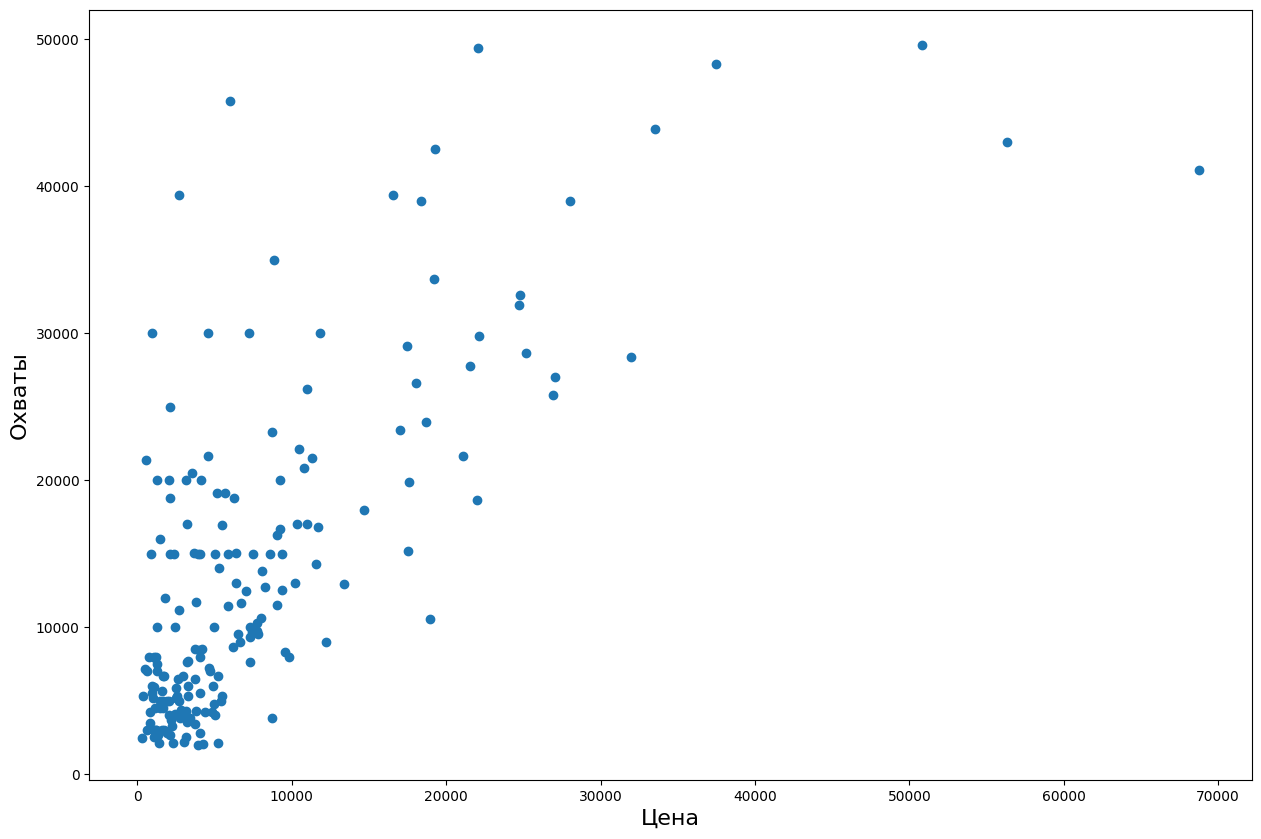

In [77]:
plt.figure(figsize=(15, 10))
plt.scatter(arr1, arr2)
plt.xlabel('Цена', fontsize=16)
plt.ylabel('Охваты', fontsize=16)

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(arr1, arr2)
plt.scatter(arr1, arr2)
plt.xlabel('Цена', fontsize=16)
plt.ylabel('Охваты', fontsize=16)

Text(0, 0.5, 'цена охвата')

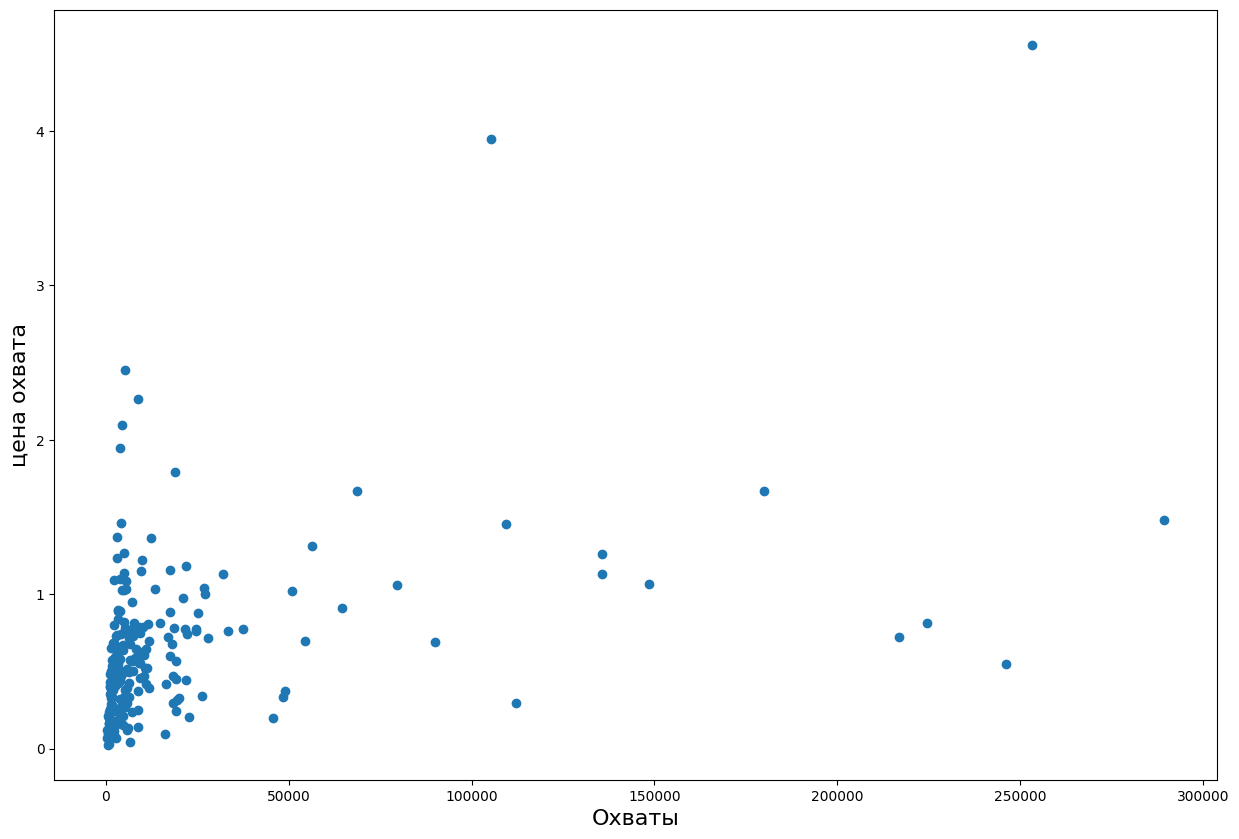

In [100]:
plt.figure(figsize=(15, 10))
plt.scatter(arr1, arr3)
plt.xlabel('Охваты', fontsize=16)
plt.ylabel('цена охвата', fontsize=16)

In [84]:
for i1, i2, i3, in zip(arr1, arr2, arr3):
    print(i1, i2, i3)

2719 11170 0.2434198746642793
11800 30000 0.3933333333333333
4954 10000 0.4954
1211 2500 0.4844
1213 2979 0.40718361866398123
1905 5000 0.381
1087 2500 0.4348
1601 3000 0.5336666666666666
5856 15000 0.3904
1200 3000 0.4
2682 5000 0.5364
5653 19149 0.2952112381847616
3263 7700 0.4237662337662338
2152 3723 0.5780284716626377
1676 4500 0.37244444444444447
4712 7000 0.6731428571428572
1715 3000 0.5716666666666667
2064 20000 0.1032
1265 7500 0.16866666666666666
1460 5000 0.292
853 15000 0.05686666666666667
627 3000 0.209
3165 20000 0.15825
919 5500 0.1670909090909091
3670 15054 0.24378902617244586
549 21400 0.025654205607476634
1300 7000 0.18571428571428572
2417 10000 0.2417
1090 8000 0.13625
1252 20000 0.0626
5134 19149 0.26810799519557155
11300 21505 0.5254591955359219
2429 4100 0.5924390243902439
374 5319 0.07031396879112616
1095 5914 0.18515387216773757
2147 25000 0.08588
4549 30000 0.15163333333333334
4102 20000 0.2051
940 30000 0.03133333333333333
969 6000 0.1615
1765 12000 0.14708333